# Prediction of Term Deposit Subscription
## Phase 1: Data Preparation & Visualisation

#### Group Name: Group 25

#### Name(s) & ID(s) of Group Members:

* Su Myat Noe Yee (S3913797)
* Priya Krishnamurthi Chandra (S3939191)
* Usman Khalid (S3914769)

## Table of Contents
* [Introduction](#introduction)
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target_Feature](#Target-Features)
* [Goals and Objective](#Goals-And-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Literature Review](#Literature-Review)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)


## Introduction <a id='introduction'></a>

The banking industry has been revolutionized in recent years with the advent of machine learning algorithms. These algorithms have made it possible to analyse large amounts of data, identify patterns, and make predictions that were previously impossible. One area where machine learning algorithms have shown significant potential is in predicting whether customers will subscribe to a term deposit. Term deposits are a popular investment option offered by banks to their customers. They offer a fixed interest rate on customers' money and hold it for a fixed period, usually ranging from a few months to several years. Banks rely on these deposits to maintain liquidity and profitability, making it crucial to predict whether customers will subscribe to them. The objective of this analysis is to provide an in-depth understanding of the banking data, and build a machine learning model that will help predict whether customers will subscribe to term deposits. By predicting whether customers will subscribe to a term deposit, banks can make informed decisions and improve their profitability, which is crucial in today's competitive banking landscape.

This project is divided into 2 phases and we will focus on phase 1 in this report. 
* Phase 1 will focus on brief overview of the project, followed by data collection, cleaning, and preprocessing. Next, it concentrates on data exploration and visualization steps, where we analyze the data, identify patterns, and visualize the relationships between the input features and the output variable. 
* Phase 2 will focus on the machine learning model building, training and evaluation. Here, we compare the performance of various machine learning algorithms and select the best model for prediction.

### Dataset Source <a id='Dataset-Source'></a>

This section of the report will focus on the dataset we will be using for this project. The dataset used in this project has been taken from UCI Machine Learning Repository (Moro et al., 2014) and can be found in this link. https://archive.ics.uci.edu/ml/datasets/bank+marketing# It contains the information related to the direct marketing campaigns of a Portuguese banking institution in 2014. In the source, the following four datasets are provided. The dataset `bank.csv` is used in this project. We rename the dataset as `Phase1_Group25.csv`.
* `bank-additional-full.csv` with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010).
* `bank-additional.csv` with 10% of the examples (4119) and 20 inputs, randomly selected from bank-additional-full.csv.
* `bank-full.csv` with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
* `bank.csv` with 10% of the examples and 17 inputs, randomly selected from bank-full.csv (older version of this dataset with less inputs).

The dataset contains the information related to the direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls (Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed). It has 4521 observations and consists of 16 descriptive features and 1 target feature called `y`. We will rename this to `subscribe`. 

The descriptive features of the dataset are as follows:
* **`age`**: age of the client (numeric)
* **`job`**: type of job (categorical: admin, blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown)
* **`marital`**: marital status (categorical: divorced, married, single,'unknown'; note: 'divorced' includes divorced and widowed)
* **`education`**: (categorical: primary, secondary, tertiary, unknown)
* **`default`**: has credit in default? (categorical: no, yes, unknown)
* **`balance`**: (numeric)
* **`housing`**: has housing loan? (categorical: no, yes, unknown)
* **`loan`**: has personal loan? (categorical: no, yes, unknown)
* **`contact`**: contact communication type (categorical: cellular, telephone, unknown)
* **`day`**: last contact day of the week (numeric)
* **`month`**: last contact month of year (categorical: jan, feb, mar, ..., nov, dec)
* **`duration`**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* **`campaign`**: number of contacts performed during this campaign and for this client (numeric)
* **`pdays`**: number of days that passed by after the client was last contacted from a previous campaign (numeric)
* **`previous`**: number of contacts performed before this campaign and for this client (numeric)
* **`poutcome`**: outcome of the previous marketing campaign (categorical: failure, success, other, unknown)

The target feature of the dataset is as follows:
* **`subscribe`**: has the client subscribed to the term deposit? (categorical: yes, no)

### Dataset Details <a id='Dataset-Details'></a>

The following steps are performed in this step:
* Packages and modules required for this project will be loaded.
* The dataset that we will be using throughout this project will be read from the UCI Machine Learning repository.
* 10 rows from the dataset are randomly selected to see the overview of the data.

In [182]:
#Importing the required packages and modules
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")

In [183]:
#Reading the csv using pandas
data = pd.read_csv('Phase1_Group25.csv')

In [184]:
#Randomly selecting 15 rows from the dataframe and setting random seed to 99 so that the program work will show the same 10 rows every time 
data.sample(10, random_state=99)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4394,43,blue-collar,married,secondary,no,10910,yes,no,cellular,15,may,66,2,-1,0,unknown,no
1701,29,unemployed,single,secondary,no,486,no,no,telephone,30,apr,95,1,-1,0,unknown,no
668,55,retired,divorced,secondary,no,138,no,no,cellular,17,jul,205,1,-1,0,unknown,no
4007,34,entrepreneur,married,tertiary,no,105,yes,no,unknown,28,may,249,2,-1,0,unknown,no
3839,51,technician,divorced,secondary,no,2323,yes,yes,cellular,18,aug,151,10,-1,0,unknown,no
1884,39,technician,married,secondary,no,-735,yes,no,cellular,30,jan,144,5,248,2,failure,no
3097,37,services,married,primary,no,52,yes,no,unknown,7,may,359,1,-1,0,unknown,no
4185,31,management,married,tertiary,no,271,no,no,cellular,18,nov,89,1,-1,0,unknown,no
1556,55,management,married,primary,no,229,no,yes,unknown,9,jun,175,3,-1,0,unknown,no
1354,58,blue-collar,married,primary,no,781,yes,no,cellular,15,may,74,2,-1,0,unknown,no


### Dataset Features <a id='Dataset-Features'></a>

The features in our dataset are described in the table below. These descriptions are taken from the UCI machine learning respository data source.

In [185]:
from tabulate import tabulate

table = [['Name','Data Type','Units','Description'],
         ['age','Numeric','NA','Age of the client'],
         ['job','Nominal categorical','NA','Type of job; admin, blue-collar, entrepreneur, housemaid, \
        \nmanagement, retired, self-employed, services, student, \ntechnician, unemployed, unknown'],
         ['marital','Nominal categorical','NA','Marital status: divorced, married, single, unknown'],
         ['education','Nominal categorical','NA','Education Level: primary, secondary, tertiary, unknown'],
         ['default','Nominal categorical','NA','Has credit in default?: no, yes, unknown'],
         ['balance','Numeric','NA','Amount of Balance'],
         ['housing','Nominal categorical','NA','Date sold'],
         ['loan','Nominal categorical','NA','Has housing loan?: no, yes, unknown'],
         ['contact','Numeric','NA','Contact communication type: cellular, telephone, unknown)'],
         ['day','Date','dd','Last contact day of the week'],
         ['month','Date','mm','Last contact month of year: jan, feb, mar, ..., nov, dec'],
         ['duration','Numeric','Seconds','Last contact duration, in seconds'],
         ['campaign','Nominal categorical','NA','Number of contacts performed during this campaign and for this client '],
         ['pdays','Numeric','NA','Number of days that passed by after the client was last contacted \
         \nfrom a previous campaign'],
         ['previous','Numeric','NA','Number of contacts performed before this campaign and for this client '],
         ['poutcome','Numeric','NA','Outcome of the previous marketing campaign: failure, success, other, \nunknown'],
         ['subscribe','Nominal categorical','NA','Has the client subscribed to the term deposit?: yes, no']]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═══════════╤═════════════════════╤═════════╤═════════════════════════════════════════════════════════════════════════════╕
│ Name      │ Data Type           │ Units   │ Description                                                                 │
╞═══════════╪═════════════════════╪═════════╪═════════════════════════════════════════════════════════════════════════════╡
│ age       │ Numeric             │ NA      │ Age of the client                                                           │
├───────────┼─────────────────────┼─────────┼─────────────────────────────────────────────────────────────────────────────┤
│ job       │ Nominal categorical │ NA      │ Type of job; admin, blue-collar, entrepreneur, housemaid,                   │
│           │                     │         │ management, retired, self-employed, services, student,                      │
│           │                     │         │ technician, unemployed, unknown                                             │
├───────

### Target Feature <a id='Target-Features'></a>

For this project, the target feature in this dataset is the outcome of subscription to term deposit. That is, the outcome whether yes or no will be predicted based on the explanatory/ descriptive variables.

## Goals and Objectives <a id='Goals-And-Objectives'></a>

The goal of this project is to help financial institutions identify customers who are more likely to subscribe to a term deposit and tailor their marketing campaigns accordingly. In order to achieve the goal, this report will have two objectives. 

The main objective is to predict whether customers will subscribe to a term deposit using machine learning algorithms by selecting the best machine learning model, evaluating its performance, and interpreting the results to inform marketing strategies for financial institutions. This is the subject of Phase 2 of the project and will focus on: 

* **Machine learning model selection**: The objective of this project is to select the best machine learning model for predicting whether customers will subscribe to a term deposit. Several machine learning algorithms will be evaluated, including Logistic Regression, Random Forest Classifier, Support Vector Machine (SVM), and Gradient Boosting Classifier.

* **Model evaluation**: Once the machine learning model is trained on the data, the next objective is to evaluate its performance. This involves using various metrics, such as accuracy, precision, recall, and F1-score, to determine how well the model performs on new data.

* **Interpretation**: The final objective of this project is to interpret the results of the machine learning model. This involves identifying which features are most important in determining whether a customer will subscribe to a term deposit and tailoring marketing campaigns to target those customers.

A secondary objective is  to find a relevant and appropriate dataset, cleaning and preprocessing the data, exploring and visualizing the data. This is the subject of the Phase 1 of the project and it is explained in detailed as follows.

* **Data collection**: Collecting a relevant and appropriate dataset is essential for any machine learning project. The objective of this project is to collect a dataset that includes customer demographic information, banking history, and other relevant features that could potentially impact whether a customer will subscribe to a term deposit.

* **Data cleaning and preprocessing**: The next objective of this project is to clean and preprocess the collected data to ensure that it is in the correct format for analysis. This involves handling missing data, addressing categorical variables, scaling the data, and splitting the data into training and testing sets.

* **Data exploration and visualization**: The objective of data exploration and visualization is to understand the patterns and relationships between the variables in the dataset. This involves conducting statistical analyses, such as mean, median, mode, and standard deviation, and using various data visualization techniques, such as scatter plots, histograms, and box plots, to gain insights into the data.




## Data Cleaning and Preprocessing

This section of report will focus on data cleaning and data preprocessing steps undertaken in this project. The following steps will be performed in order during data cleaning and data preparation stage.
* Check outliers and unusual values 
* Check Missing values
* Encoding categorical descriptive feature to be numeric: One-hot-encoding for nominals, One-hot-encoding or integer-encoding for ordinals
* Scaling all descriptive features (which are all numeric at this point)
* Label-Encoding target feature 
* Selecting small random subset of entire dataset 
* Converting Panda series or dataframe into NumPy before fitting any Scikit-Learn models

Before we do any of those, some basic data preparation will be performed.
* Check ID like columns and make it as column index
* Find irrelevant/ redundant features and remove them
* Find Date and time features and convert as appropriate to avoid time series independency

### Data Cleaning

We will do following bais data preparation and some data cleaning steps in this report. 
* Check dataset and dropping irrelevant features
* Check dataset and rename irrelevant column names
* Check missing values and remove the rows with missing values or imputing
* Check outliers and do clamp transforming

This step is crucial in order to avoid data quality issues. The most common data quality issues are: Missing values, Irregular cardinality and Outliers.

To solve the issue of missing values, we will either drop the observation with missing values or we will perform imputation which means replacing the missing values with mean or median or mode, depending on whether it is numerical features or categorical features. 

To solve the issue of irregular cardinality, we will group similar values into a new category.  For example, grouping rare categories into an "other" category.

To solve the issues of outliers, we will do clamp transformation which is remove the outliers if its is lower than lower thresholds and greater than upper thresholds.



Displaying all columns in our dataset to check ID like features, irrelevant/ redundant and date time features. Taking a look at the dataset' features, every attributes is unique, no date time and not considered redundant for the model. Thus, no column will be removed from the dataset. 

In [186]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Check dataset and rename irrelevant column names. As seen above, some of the columns name are not irrelevant and not properly labeled. If column names are unclear, it makes it difficult to understand and make it challenging to interpret the data. Thus, we will rename the column names to make the dataset more user-friendly and easier to understand. Also, in order to keep consistency, we will remove all white spaces and change every column names to lower case. 

In [187]:
# Changing column names to lower cases and removing white spaces
data.columns = data.columns.str.strip()
data.columns = data.columns.str.lower()

#Relabelling the columns to make it more relevant and appropriate
data = data.rename(columns = {'y':'subscribe'})
data.sample(10, random_state=99)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
4394,43,blue-collar,married,secondary,no,10910,yes,no,cellular,15,may,66,2,-1,0,unknown,no
1701,29,unemployed,single,secondary,no,486,no,no,telephone,30,apr,95,1,-1,0,unknown,no
668,55,retired,divorced,secondary,no,138,no,no,cellular,17,jul,205,1,-1,0,unknown,no
4007,34,entrepreneur,married,tertiary,no,105,yes,no,unknown,28,may,249,2,-1,0,unknown,no
3839,51,technician,divorced,secondary,no,2323,yes,yes,cellular,18,aug,151,10,-1,0,unknown,no
1884,39,technician,married,secondary,no,-735,yes,no,cellular,30,jan,144,5,248,2,failure,no
3097,37,services,married,primary,no,52,yes,no,unknown,7,may,359,1,-1,0,unknown,no
4185,31,management,married,tertiary,no,271,no,no,cellular,18,nov,89,1,-1,0,unknown,no
1556,55,management,married,primary,no,229,no,yes,unknown,9,jun,175,3,-1,0,unknown,no
1354,58,blue-collar,married,primary,no,781,yes,no,cellular,15,may,74,2,-1,0,unknown,no


Check missing values and in case we find it, we will do either dropping observation or imputing observation as Scikit-Learning doesn't work with missing values. 

In [188]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
print(data.isna().sum())


Number of missing values for each column/ feature:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64


We observe that there is no missing values in the dataset, thus no further process is needed. However, we will take a detailed look at unique values of each features to capture whether they are coded with different labels such as "?" or "99999999999". In order to do that, first, we check the data types of every columns as follows.  

In [189]:
# Check for data types
print(f"Shape of the dataset = {data.shape} \n")
print(data.dtypes)

Shape of the dataset = (4521, 17) 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
subscribe    object
dtype: object


Now, we will display the unique values of all columns with categorical data types to check if there are any white spaces and other data quality issues such as "?" or "99999999999".

In [190]:
# Exracting all the categorical columns from dataset
categoricalColumns = data.columns[data.dtypes==object].tolist()

#To see all unique values for categorical data types
for col in categoricalColumns:
    print('Unique values for ' + col)
    print(data[col].unique())
    print('')

Unique values for job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

Unique values for marital
['married' 'single' 'divorced']

Unique values for education
['primary' 'secondary' 'tertiary' 'unknown']

Unique values for default
['no' 'yes']

Unique values for housing
['no' 'yes']

Unique values for loan
['no' 'yes']

Unique values for contact
['cellular' 'unknown' 'telephone']

Unique values for month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

Unique values for poutcome
['unknown' 'failure' 'other' 'success']

Unique values for subscribe
['no' 'yes']



We observe from above that the data in all categorical features is clean and hence, decide no futher data cleaning steps are necessary. Afterwards, we will look into summary statistics of numerical and categorical features which looks as follows.

In [191]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
data.describe(include='object').T

,count,unique,top,freq
job,4521,12,management,969
marital,4521,3,married,2797
education,4521,4,secondary,2306
default,4521,2,no,4445
housing,4521,2,yes,2559
loan,4521,2,no,3830
contact,4521,3,cellular,2896
month,4521,12,may,1398
poutcome,4521,4,unknown,3705
subscribe,4521,2,no,4000


In [192]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of numeric features</b>'))
data.describe(include=np.number).round(3)

,age,balance,day,duration,campaign,pdays,previous
count,4521.000,4521.000,4521.000,4521.000,4521.000,4521.000,4521.000
mean,41.170,1422.658,15.915,263.961,2.794,39.767,0.543
std,10.576,3009.638,8.248,259.857,3.110,100.121,1.694
min,19.000,-3313.000,1.000,4.000,1.000,-1.000,0.000
25%,33.000,69.000,9.000,104.000,1.000,-1.000,0.000
50%,39.000,444.000,16.000,185.000,2.000,-1.000,0.000
75%,49.000,1480.000,21.000,329.000,3.000,-1.000,0.000
max,87.000,71188.000,31.000,3025.000,50.000,871.000,25.000


The summary statistics are generated for all the numerical features are shown above. There does not seem to be any outliers in the data. 

### Random sampling

Random sampling of the dataset for 1000 rows.

In [193]:
data_smp = data.sample(n=1000, random_state=999)
data_smp.shape
data_smp.sample(5, random_state=999)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
4296,33,admin.,single,secondary,no,894,no,no,cellular,5,feb,509,2,-1,0,unknown,no
428,32,blue-collar,married,secondary,no,2366,yes,no,unknown,20,may,127,2,-1,0,unknown,no
1841,41,technician,single,secondary,no,1680,yes,no,unknown,2,jun,76,2,-1,0,unknown,no
1412,57,admin.,divorced,unknown,no,4012,no,no,cellular,20,nov,915,1,-1,0,unknown,no
3935,38,management,single,tertiary,no,1704,no,no,cellular,1,sep,222,1,-1,0,unknown,no


## Data Exploration and Visualisation

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

### Univariate Visualisation

#### Percentage of Term Deposit Subscribers

We plot a bar chart to understand the proportion of term deposit subscribers in the whole dataset. As we can see in Figure 1, 11.5% are subscribers and 88.5% are non-subscribers.



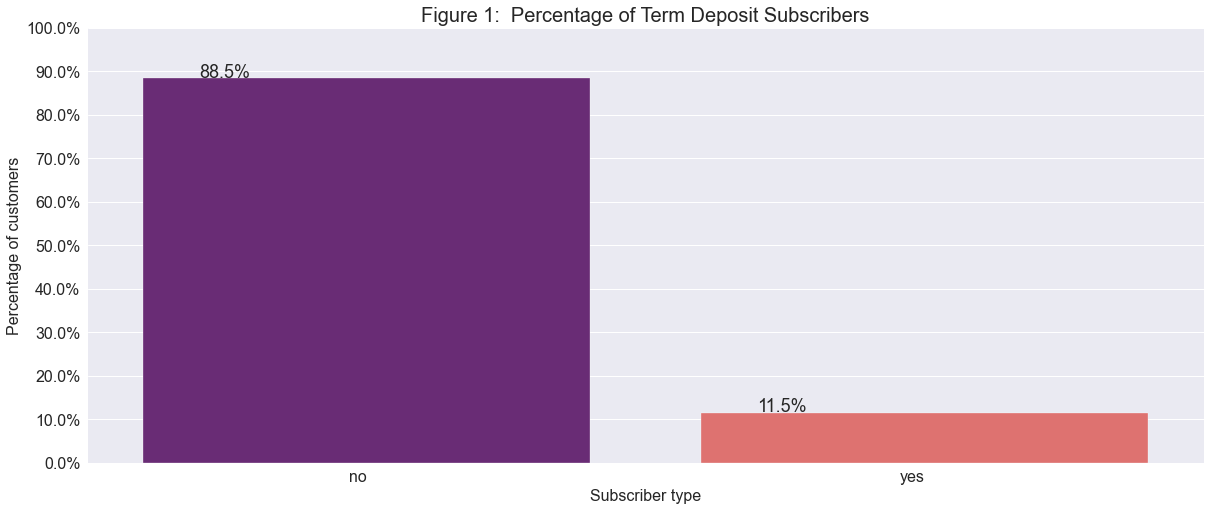

In [194]:
  plt.figure(figsize=(20,8))
  Y = data["subscribe"]
  total = len(Y)*1.
  ax=sns.countplot(x="subscribe", data=data, palette = 'magma')
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+), fontsize = 18)
    
  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total), fontsize=14)
  ax.set_xticklabels(ax.get_xticklabels(),  ha="right" , fontsize=14)
  # ax.legend(labels=["no","yes"])
  plt.xlabel('Subscriber type', fontsize = 16)
  plt.ylabel('Percentage of customers', fontsize = 16)
  plt.title('Figure 1:  Percentage of Term Deposit Subscribers', fontsize = 20)
  plt.xticks(fontsize = 16)
  plt.yticks(fontsize = 16)
  plt.show()

#### Number of Campaigns by Month

We plot a bar chart to understand the number of campaigns run by month. As we can see in Figure 2, the highest number of campaigns were run in May, followed by July and August. December had the lowest number of campaigns.

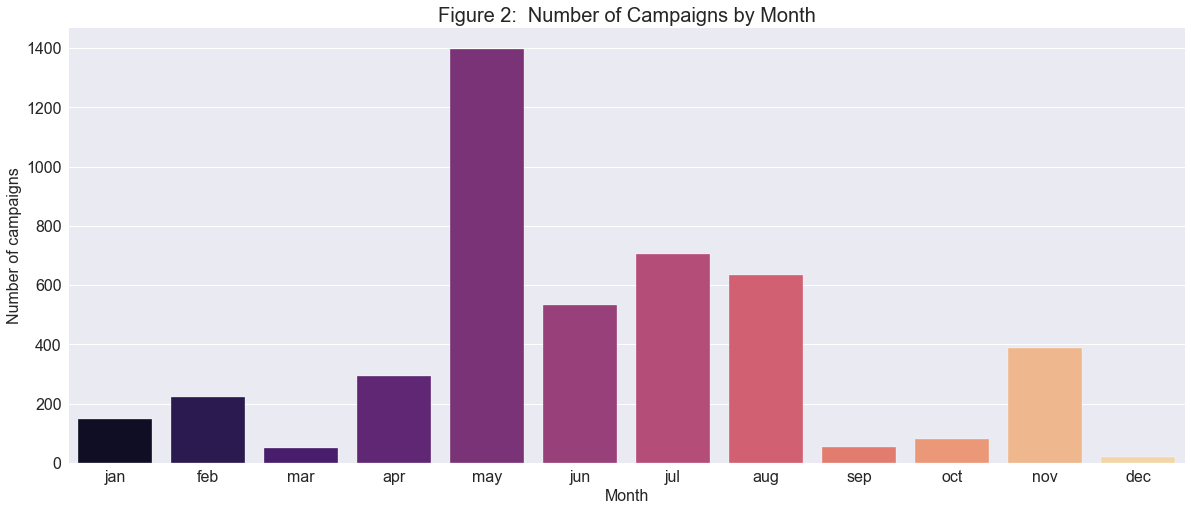

In [195]:
plt.figure(figsize = (20,8))
Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
             'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
fig = sns.countplot(x = 'month', data = data,
                   palette = 'magma', order = Months)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Number of campaigns', fontsize = 16)
fig = plt.title('Figure 2:  Number of Campaigns by Month', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

#### Number of Subscribers by Age Group

We plot a histogram to represent the frequency distribution of the age of customers who subscribed to term deposits. This helps us understand how many subscribers belong to each of the age groups. As we can see in Figure 3, the age group 25-40 has the highest number of subscribers compared to the other age groups. Not surprisingly, senior citizens over 70 have the lowest number of subscribers.

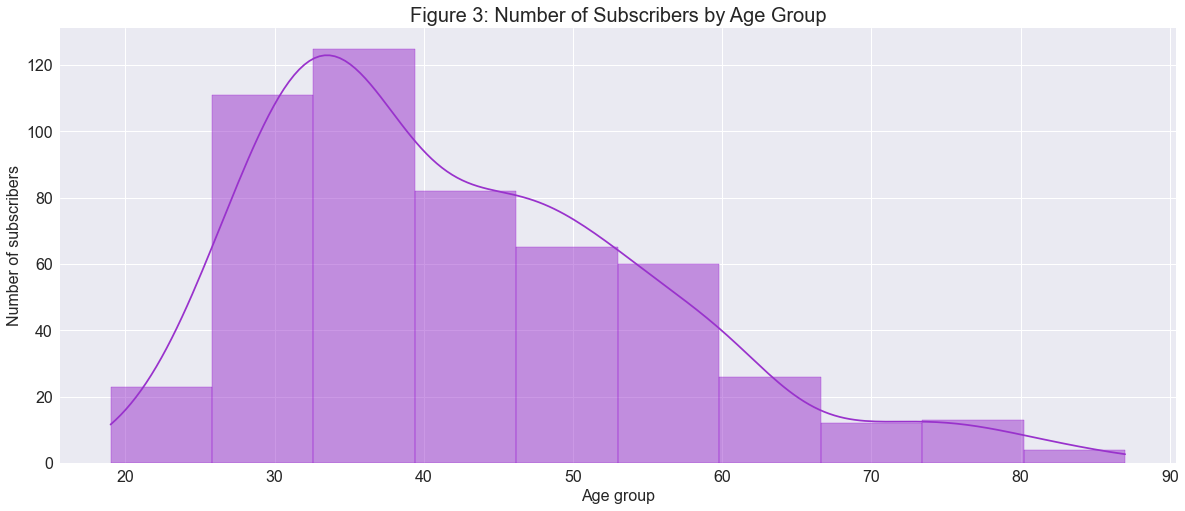

In [196]:
data_sub = data[data['subscribe']=='yes']
plt.figure(figsize = (20,8))
fig = sns.histplot(data=data_sub, x='age', kde=True, color='darkorchid', edgecolor='darkviolet',bins=10)
plt.xlabel('Age group', fontsize = 16)
plt.ylabel('Number of subscribers', fontsize = 16)
fig = plt.title('Figure 3: Number of Subscribers by Age Group', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

#### Number of Subscribers by Job Type

We plot a bar chart to understand the job-type of customers who subscribed to term deposits. This can help decide the right target audience in order to deliver more tailored messaging and build stronger connections. As we can see in Figure 4, Management jobs have the highest number of subscribers, followed by Technicians and Blue-collared jobs. Housemaids and Unemployed workers have the lowest number of subscribers.

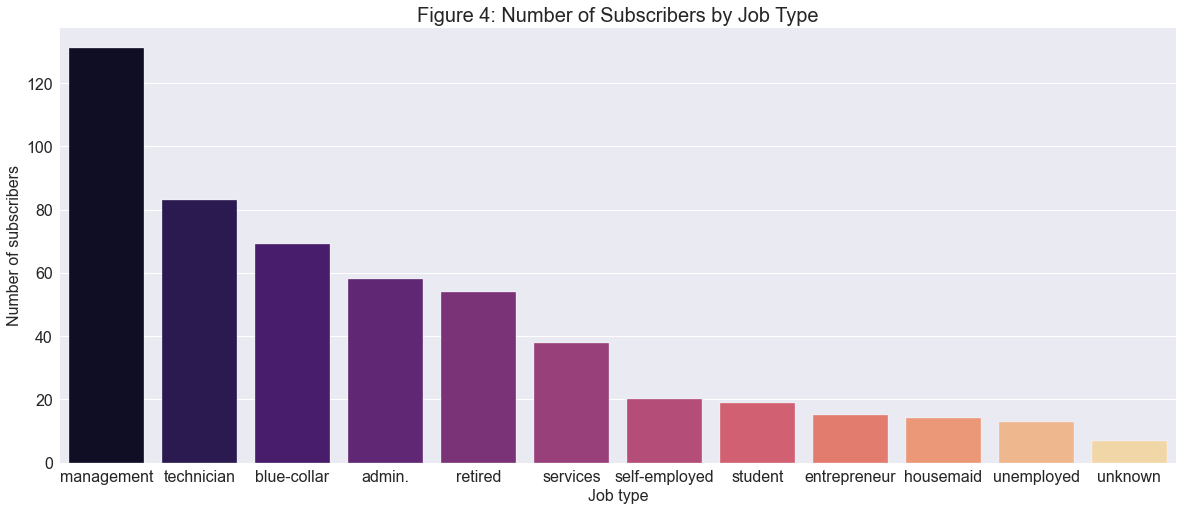

In [197]:
data_sub = data[data['subscribe']=='yes']
plt.figure(figsize = (20,8))

fig = sns.countplot(x = 'job', 
                    data = data_sub,
                   palette = 'magma', 
                    order = data_sub['job'].value_counts().index)
plt.xlabel('Job type', fontsize = 16)
plt.ylabel('Number of subscribers', fontsize = 16)
fig = plt.title('Figure 4: Number of Subscribers by Job Type', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

#### Boxplot of Bank Balance of Subscribers

We can see in Figures 5A and 5B that the distribution of bank balance is clearly right-skewed and has a huge range. There are a lot of outliers with a high bank balance.

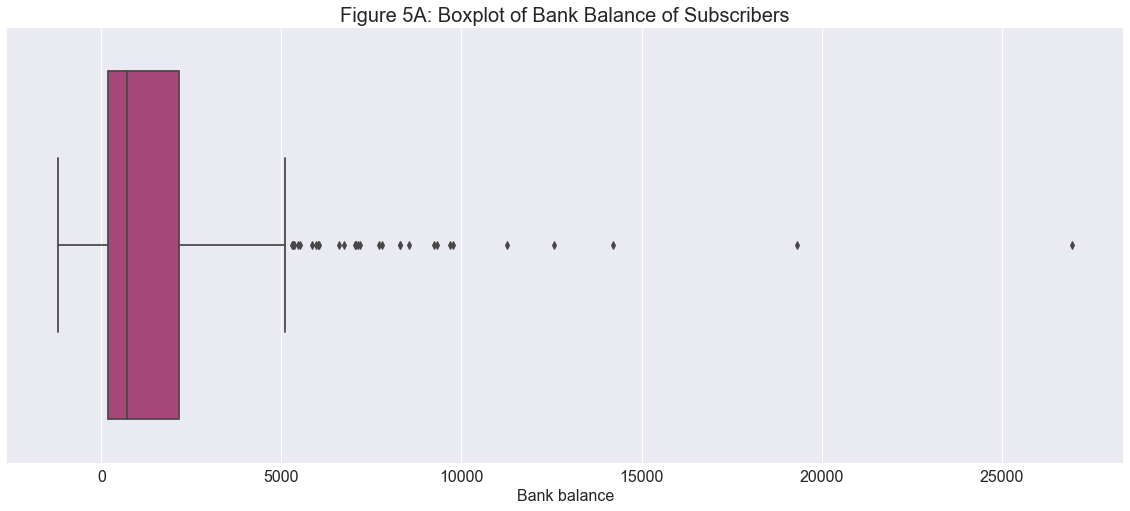

In [198]:
data_sub = data[data['subscribe']=='yes']
plt.figure(figsize = (20,8))

fig = sns.boxplot(data_sub['balance'], palette='magma')
plt.xlabel('Bank balance', fontsize = 16)
fig = plt.title('Figure 5A: Boxplot of Bank Balance of Subscribers', fontsize = 20)
plt.xticks(fontsize = 16)
plt.show()

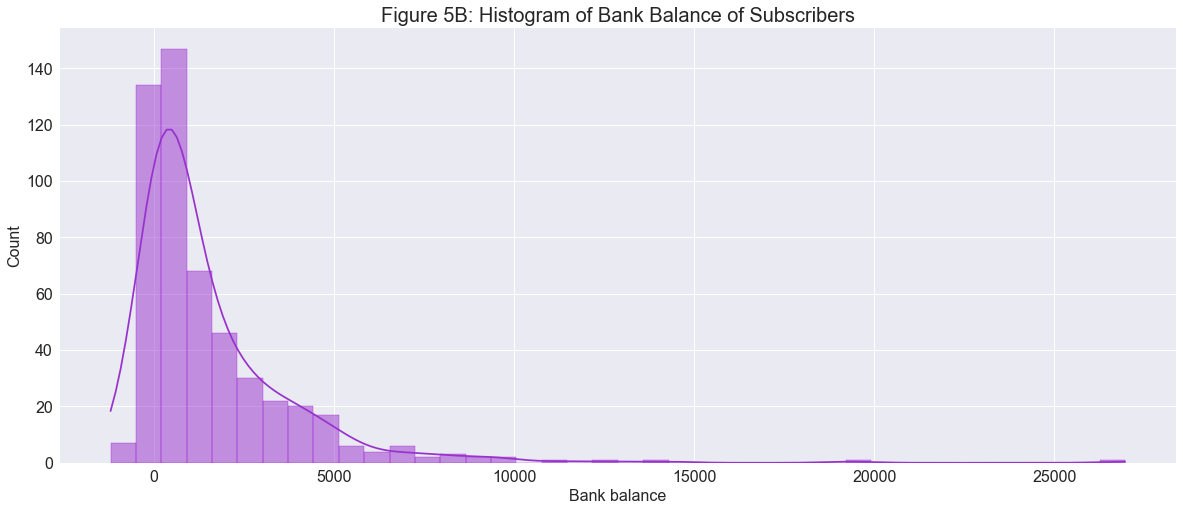

In [199]:
plt.figure(figsize = (20,8))
sns.histplot(data_sub['balance'], kde=True, color='darkorchid', edgecolor='darkviolet', bins=40).set_title('Figure 5B: Histogram of Bank Balance of Subscribers', fontsize = 20)
plt.xlabel('Bank balance', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show();

### Two-Variable Visualisation

#### Boxplot of Call Duration by Subscriber Type

We plot boxplots to display the distribution of call duration for subscribers and non-subscribers. From figure 5, we can see that subscribers have a higher call duration compared to non-subscribers; the median, range and interquartile range are much higher for subscribers. This is as per expectation because subscribers would be more interested to understand the details of the term deposits before subscribing and hence would have higher call durations.

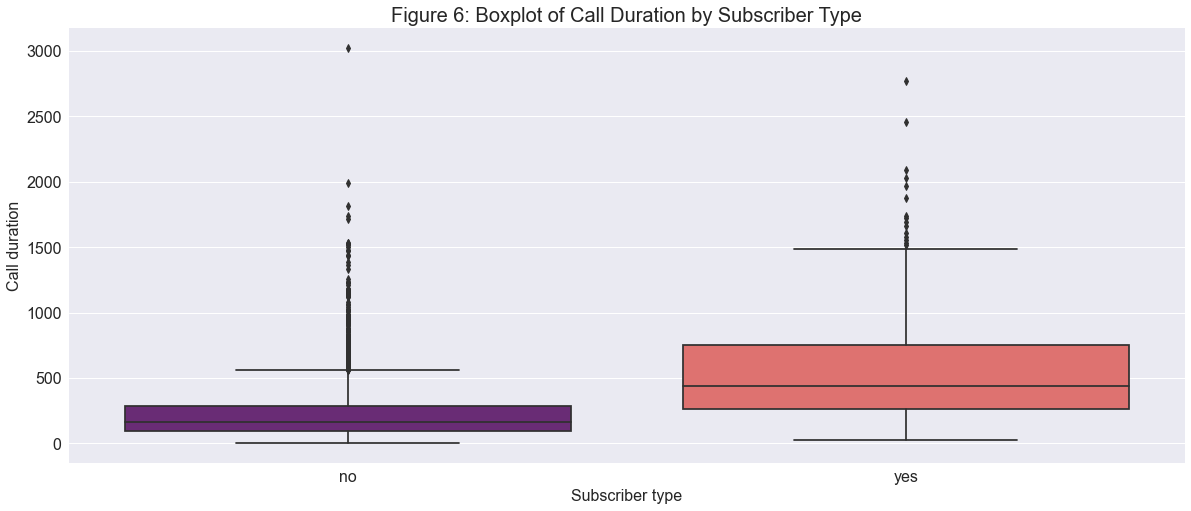

In [200]:
plt.figure(figsize = (20,8))
sns.boxplot(data['subscribe'], data['duration'], palette='magma')
plt.xlabel('Subscriber type', fontsize = 16)
plt.ylabel('Call duration', fontsize = 16)
plt.title('Figure 6: Boxplot of Call Duration by Subscriber Type', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show();

#### Boxplot of Bank Balance by Subscriber Type

We plot boxplots to display the distribution of bank balance for subscribers and non-subscribers. From figure 5, we can see that subscribers have a higher bank balance compared to non-subscribers; the median, range and interquartile range are higher for subscribers. There are a lot of outliers with high bank balance for both groups, more so for non-subscribers.

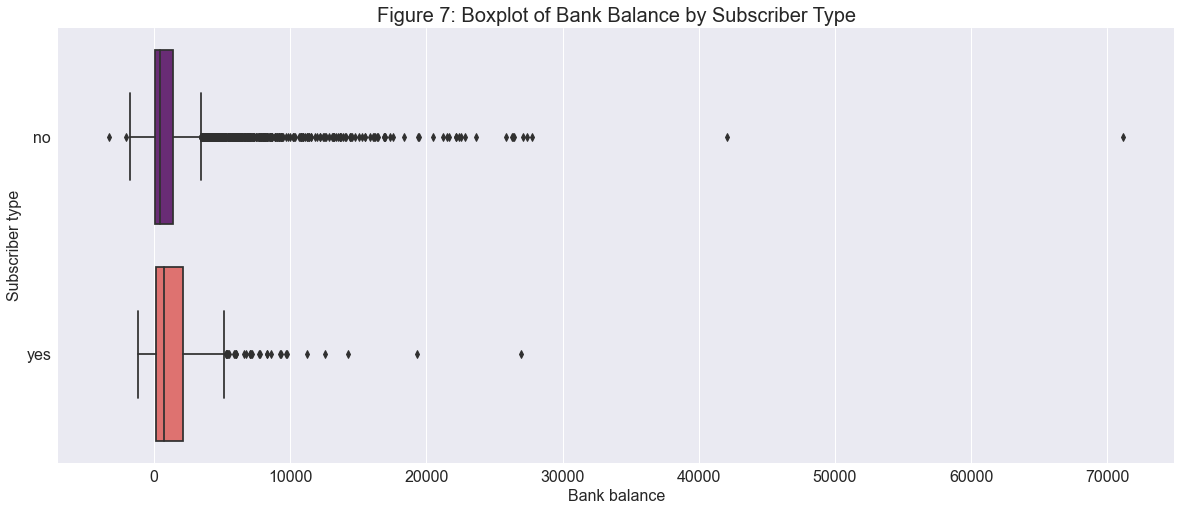

In [201]:
plt.figure(figsize = (20,8))
sns.boxplot(y = data['subscribe'], x = data['balance'],palette='magma')
plt.xlabel('Bank balance', fontsize = 16)
plt.ylabel('Subscriber type', fontsize = 16)
plt.title('Figure 7: Boxplot of Bank Balance by Subscriber Type', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show();

#### Proportion of Subscribers by Education Level

We plot stacked bar charts to display the proportion of subscribers and non-subscribers for different levels of education. From figure 8, we can see that Tertiary and Secondary education levels have a higher proportion of subscribers, compared to Primary education level.

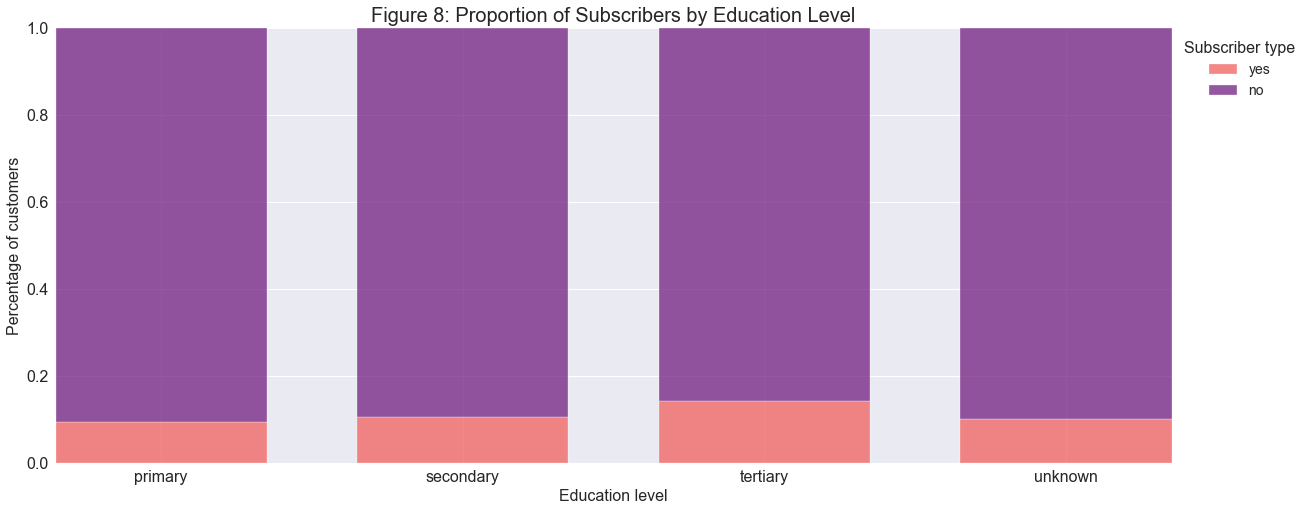

In [202]:
plt.figure(figsize = (20,8))
fig = sns.histplot(data, x="education", hue="subscribe", 
             stat="probability", multiple="fill",  shrink=.7, 
             palette='magma')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Education level', fontsize = 16)
plt.ylabel('Percentage of customers', fontsize = 16)
plt.legend(labels=["yes","no"], title = "Subscriber type", 
           fontsize = 14, title_fontsize = "16", bbox_to_anchor = (1,1))
plt.title('Figure 8: Proportion of Subscribers by Education Level', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show();

#### Proportion of Subscribers by Previous Campaign Outcome

We plot stacked bar charts to display the proportion of subscribers and non-subscribers for different outcomes from the previous marketing campaign. From figure 9, we can see that those that had a successful outcome from the previous campaign tended to have a higher success rate in the current campaign as well.

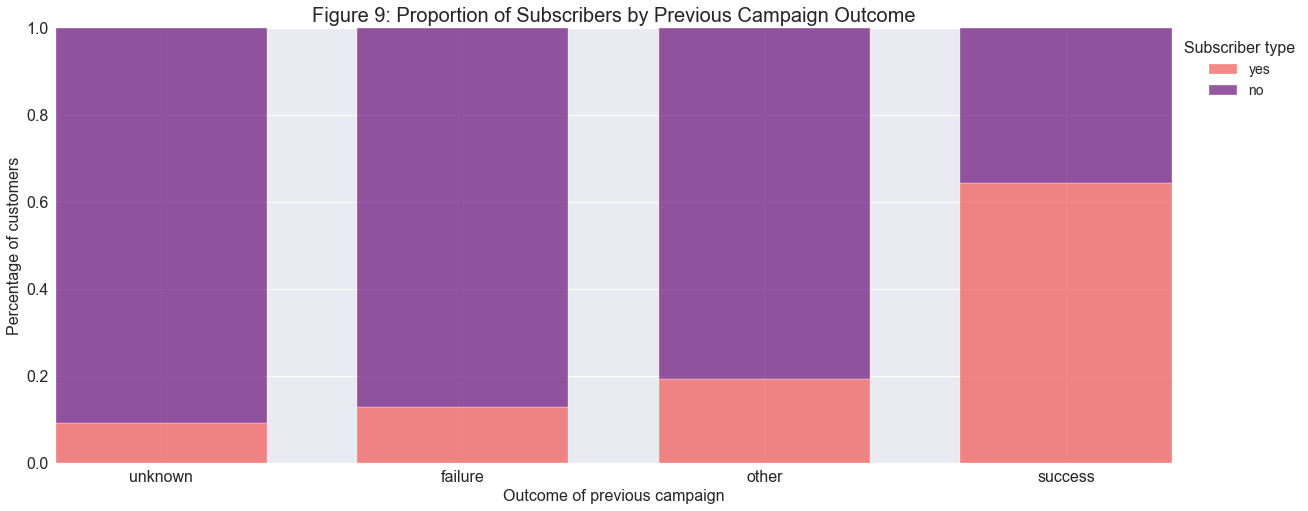

In [203]:
plt.figure(figsize = (20,8))
fig = sns.histplot(data, x="poutcome", hue="subscribe", 
             stat="probability", multiple="fill",  shrink=.7, 
             palette='magma')
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('Outcome of previous campaign', fontsize = 16)
plt.ylabel('Percentage of customers', fontsize = 16)
plt.legend(labels=["yes","no"], title = "Subscriber type", 
           fontsize = 14, title_fontsize = "16", bbox_to_anchor = (1,1))
plt.title('Figure 9: Proportion of Subscribers by Previous Campaign Outcome', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show();

### Three-Variable Visualisation

#### Boxplot of Age by Education Level and Subscriber Type

We can clearly see in Figure 10 that for secondary and tertiary education levels, the median age is more or less similar for subscribers and non-subscribers. For primary education, the median age of subscribers is ~6 years higher compared to non-subscribers.

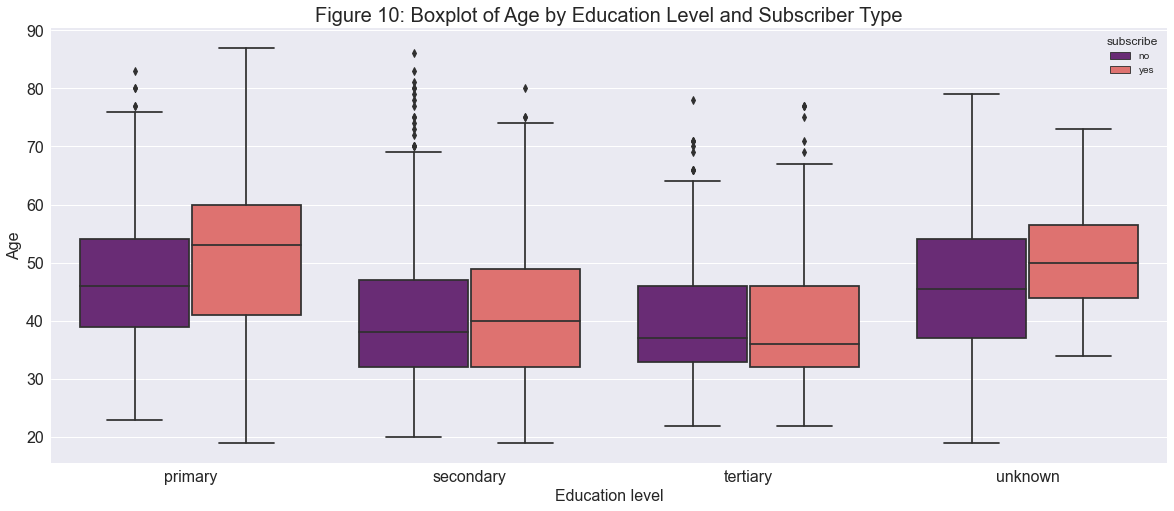

In [204]:
plt.figure(figsize = (20,8))
sns.boxplot(data['education'], data['age'], 
            hue = data['subscribe'], palette = 'magma')
plt.xlabel('Education level', fontsize = 16)
plt.ylabel('Age', fontsize = 16)
plt.title('Figure 10: Boxplot of Age by Education Level and Subscriber Type', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show();

#### Barplot of Days Since Last Campaign by Job Type and Subscriber Type 

Overall, we observe from Figure 11 that higher the days since the previous campaign, higher is the chance of subscription. If the customer is called within 30 days of the previous campaign, he/she is more likely to not subscribe.

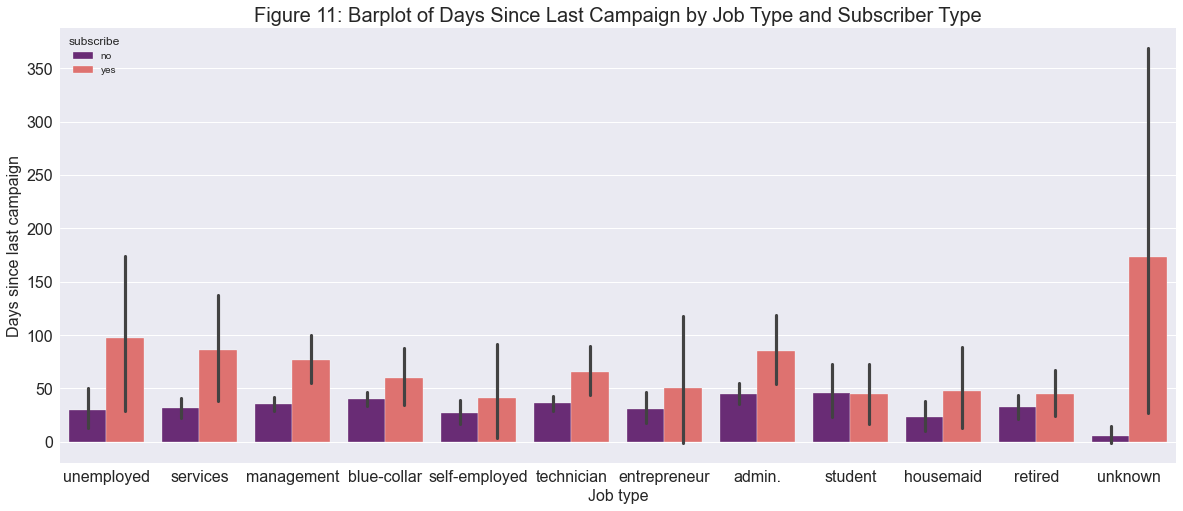

In [205]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'job', y='pdays', hue = 'subscribe', data = data, palette='magma')
plt.xlabel('Job type', fontsize = 16)
plt.ylabel('Days since last campaign', fontsize = 16)

plt.title('Figure 11: Barplot of Days Since Last Campaign by Job Type and Subscriber Type', fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show();

#### Scatter plot of Age and Bank Balance by Subscriber Type

From Figure 12, it can be seen that customers with a very high balance tend to not subscribe to term deposits (These are the outliers from Figure 7). There is no clear trend for younger ages, but there is a larger proportion of subscribers among older people. 

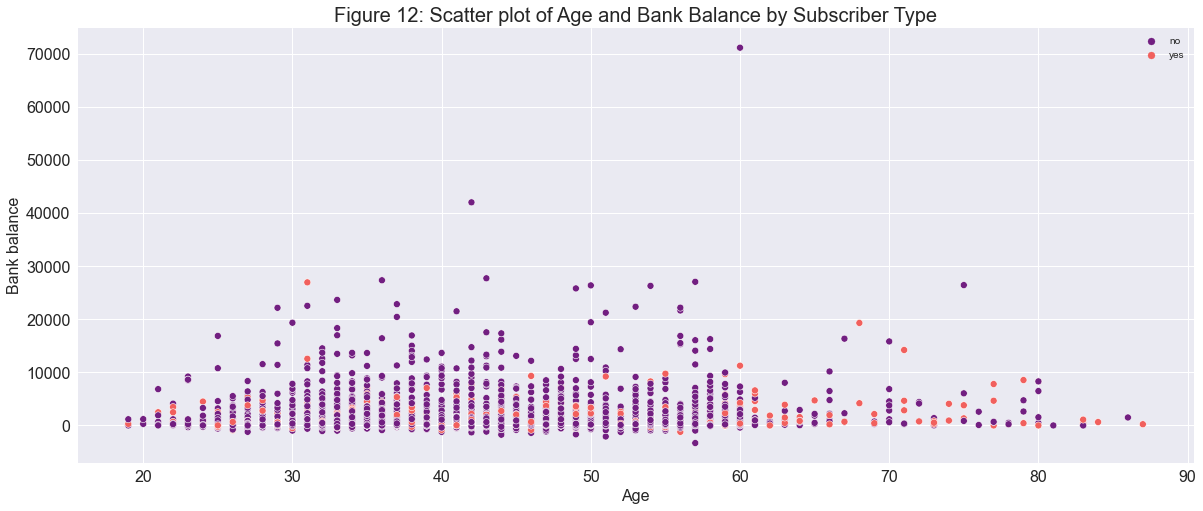

In [206]:
plt.figure(figsize = (20,8))
sns.scatterplot(data['age'], data['balance'], hue = data['subscribe'], palette='magma')
plt.xlabel('Age', fontsize = 16)
plt.ylabel('Bank balance', fontsize = 16)

plt.title('Figure 12: Scatter plot of Age and Bank Balance by Subscriber Type', fontsize = 20);
plt.legend(loc = 'upper right')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show();

#### Number of Calls by Contact Type and Subscriber type

From Figure 13, we can clearly see that customers tend to subscribe to term deposits after fewer calls/campaigns compared to non-subscribers. On average, customers tend to subscribe within 2.5 calls; they tend to not subscribe when the number of calls exceeds 2.5. 

<Figure size 1440x576 with 0 Axes>

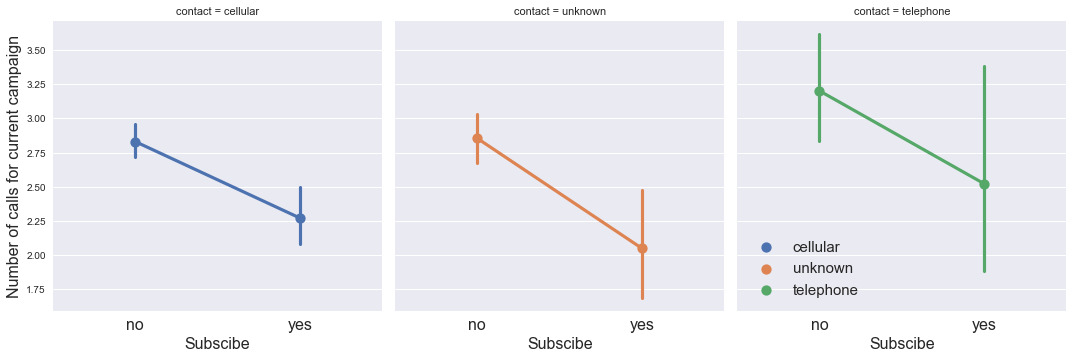

In [208]:
plt.figure(figsize = (20,8)).suptitle("Hello")
g = sns.factorplot(x="subscribe", y="campaign", 
                   hue="contact", col="contact", margin_titles= True,
                   data=data, col_wrap=3, palette = 'deep')
g.set_axis_labels("Subscibe", "Number of calls for current campaign",  fontsize= 16)
g.ylim=([0, 4])
g.set_xticklabels(fontsize= 16)

plt.legend(loc = 'lower left', fontsize = 15)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show();

####  <center> Figure 13: Number of Calls by Contact Type and Subscriber type </center>

## Literate Review

Prediction of term deposit subscription is an important problem in the banking sector, which can help banks to better target their marketing efforts and improve customer acquisition. With the growing availability of large-scale data and advancements in machine learning techniques, several studies have been conducted to predict the likelihood of a customer subscribing to a term deposit. This literature review summarizes some of the recent research studies in this area.
* The first paper, “Business Analytics in Telemarketing: Cost-Sensitive Analysis of Bank Campaigns Using Artificial Neural Networks” utilized an advanced neural network with a multi-layer perceptron classifier to improve client prediction by alleviating the effect of imbalanced data. Comparisons were made with several conventional machine learning classifiers, with the random forest algorithm offering the highest accuracy of 89.98%.
* The second paper, “Data Pre-processing Algorithm for Neural Network Binary Classification Model in Bank Tele-Marketing,” shows the highest performance accuracy is achieved by combining Missing Common (MC), Tomek Links (TL), and MinMaxScaler (MMS) algorithms to pre-process the data, which was then processed by a binary classification neural network.
* Paper “Bank Deposit Prediction Using Ensemble Learning” show that the stacking ensemble method outperformed other methods such as bagging and boosting. The author also compared the performance of the ensemble methods with individual classifiers such as decision trees, random forests, and support vector machines, and found that the ensemble methods provide better predictive accuracy. The study concludes that ensemble learning techniques are effective in predicting bank deposits and can provide better results than individual classifiers.
* The fourth paper, “Visualization and Analysis in Bank Direct Marketing Prediction,” discussed the effect of oversampling on highly imbalanced data and concluded that agglomerative hierarchical clustering is better than oversampling. Naïve Bayes was determined to be the best classifier for such datasets, with the best accuracy of 88.8% for the random forest algorithm achieved with a 400% SMOTE percentage.
* In the fifth paper, "The Rise of Machine Learning in Marketing: Goal, Process, and Benefit of AI-Driven Marketing," the author summarized the goals, process, and benefits of machine learning for marketing and discussed an artificial intelligence-driven marketing model.
* Author of paper, “A data-driven approach to predict the success of bank telemarketing” conducted a comparison analysis between four data mining models, and neural networks (NNs) performed the best, resulting in an area under the receiver operating characteristic curve (AUC) of 0.80 and an area under the LIFT cumulative curve (ALIFT) of 0.67 during rolling window evaluation. 
* The paper "A Machine Learning Framework towards Bank Telemarketing Prediction" presents a class membership-based approach to improve call success prediction in a commercial banking telemarketing campaign. The approach preprocesses data and optimizes the use of dummy variables to improve performance and reduce processing time. The model was found to be more robust and stable than classical machine learning algorithms, with best performance reaching 97.3% accuracy. The study suggests that the approach offers a transparent and efficient solution for telemarketing campaign prediction. However, the approach is not suitable for other types of supervised machine learning problems.
* “Predicting Bank Term Deposit Subscription with Logistic Regression” analysed on different predictive models, recursive feature elimination and the analysis shows. The study finds that the recursive feature elimination model performs similarly to the logistic regression model, indicating a performance wall in the model's predictive ability. Their analysis shows that previous subscribers and potential customers who have not removed themselves from the direct marketing contact list are more likely to subscribe in the future.  
* The paper, “Predicting the Success of Bank Telemarketing for Selling Long-term Deposits: An Application of Machine Learning Algorithms”, also showed that logistic regression algorithm has better accuracy compared to others as well. 
* The conference paper, “Identifying Long-Term Deposit Customers: A Machine Learning Approach” tested on several machine learning algorithms and the analysis show logistic regression was found to be the best option for creating the model according to accuracy score, sensitivity, and specificity analysis, achieving an accuracy of 90.64% in predicting long-term deposit customers. 
* The paper, “Applying Machine Learning to the Development of Prediction Models for Bank Deposit Subscription”, five various machine learning techniques such as Naive Bayes, Decision Tree, Random forests, Support Vector Machine and Neural Network are used and found that there’s not much difference in all models’ accuracy and sensitivity. It seems that stable employment rate plays quite important role as it indicates a stable economic environment, in which bank clients are more confident to make financial investments. 
* The conference paper, “Development of Prediction in Clients’ Consent to a Bank Term Deposit Using Feature Selection” shows that use of feature selection (FS) algorithms can reduce the number of attributes in a large dataset while maintaining accuracy rates and reducing run-time. A study on a bank dataset reduced the number of attributes from 16 to 9 using the Sequential Forward Selection (SFS) algorithm, which resulted in almost the same predictive model results as the original dataset. The study suggests that using FS algorithms can save time and provide more flexibility in software package choice. Future work can explore the effectiveness of different FS algorithms on larger datasets.
* The conference paper, "Comparative Study of Machine Learning Algorithms for Portuguese Bank Data", shows light GBM appears to be a good choice for similar datasets due to its efficient processing time and comparable performance to other algorithms in terms of accuracy, precision, recall, and f1-score.
* The study from conference paper, "Deep Learning Based Methods for Processing Data in Telemarketing-Success indicate that deep learning methods perform better on balanced datasets as compared to unbalanced datasets. Additionally, the study found that the LSTM method is more effective on a balanced dataset. The proposed models showed better accuracy rates in the telemarketing sector.

To sum up, the application of machine learning methods has demonstrated encouraging outcomes in forecasting bank telemarketing results. The research mentioned in this summary highlights the effectiveness of diverse algorithms including logistic regression, decision tree, random forest, support vector machine, neural network, and deep learning. Furthermore, preprocessing the data using techniques such as Missing Common, Tomek Links, MinMaxScaler, and feature selection methods like Sequential Forward Selection has proven to improve accuracy and reduce run time. Ensemble learning techniques have shown to be useful in predicting bank deposits, and light GBM is a viable option for comparable datasets due to its efficiency and similar performance to other algorithms in terms of accuracy, precision, recall, and f1-score. The studies also emphasize the importance of addressing imbalanced datasets and exploring the effectiveness of various algorithms on larger datasets in the future.

## Summary and Conclusions

## References

* Abu-Srhan, A., Alhammad, Bara’a., Al-Zghoul, Sanaa., & Al-Sayyed, R. (2019). Visualization and Analysis in Bank Direct Marketing Prediction. International Journal of Advanced Computer Science and Applications, 10(7), 651-657. https://pdfs.semanticscholar.org/8274/71809c42b759b6433bc2b7875f8e36ec74b8.pdf

* Borugadda, P., Nandru, P., & Madhavaiah, C. (2021). Predicting the Success of Bank Telemarketing for Selling Long-term Deposits: An Application of Machine Learning Algorithms. Journal of St. Theresa Journal of Humanities and Social Sciences. https://journal.stic.ac.th/index.php/sjhs/article/view/296/85

* Ghatasheh, N., Faris, H., AlTaharwa, I., Harb, Y., & Harb, A. (2020). Business Analytics in Telemarketing: Cost-Sensitive Analysis of Bank Campaigns Using Artificial Neural Networks. Applied Sciences, 10(7), 2581. https://www.mdpi.com/2076-3417/10/7/2581

* Gupta, A., Raghav, A., & Srivastava, S. (2021). Comparative Study of Machine Learning Algorithms for Portuguese Bank Data. In 2021 International Conference on Computing, Communication, and Intelligent Systems (ICCCIS) (pp. 401-406). Greater Noida, India: IEEE. https://ieeexplore.ieee.org/abstract/document/9397083/citations#citations

* Halim, K., Fadzil, A., & Jaya, A. (2020). Data Pre-Processing Algorithm for Neural Network Binary Classification Model in Bank Tele-Marketing. International Journal of Innovative Technology and Exploring Engineering, 9(3), 272-277. https://www.researchgate.net/profile/Ahmad-Fadzil/publication/340464651_Data_Pre-Processing_Algorithm_for_Neural_Network_Binary_Classification_Model_in_Bank_Tele-Marketing/links/5e8b97e792851c2f52866b0d/Data-Pre-Processing-Algorithm-for-Neural-Network-Binary-Classification-Model-in-Bank-Tele-Marketing.pdf

* Hou, S., Cai, Z., Wu, J., Du, H., & Xie, P. (2022). Applying Machine Learning to the Development of Prediction Models for Bank Deposit Subscription. International Journal of Business Analytics (IJBAN), 9(1), 1-14. https://www.igi-global.com/article/applying-machine-learning-to-the-development-of-prediction-models-for-bank-deposit-subscription/288514

* Kinskey, I., Rasmus-Vorrath, J., & Karanja, A. (2017). Predicting Bank Marketing Campaign Success Using Logistic Regression with Feature Selection and Cross Validation. MSDS 6372 Applied Statistics: Inference and Modeling, Section 403. Bank Marketing Data Set. https://www.academia.edu/34329045/Predicting_Bank_Term_Deposit_Subscription_with_Logistic_Regression

* Koumetio Tekouabou, C. S., Gherghina, Ş. C., Toulni, H., Neves Mata, P., Mata, M. N., & Martins, J. M. (2022). A Machine Learning Framework towards Bank Telemarketing Prediction. Journal of Risk and Financial Management, 15(6), 269. https://www.researchgate.net/publication/361389452_A_Machine_Learning_Framework_towards_Bank_Telemarketing_Prediction

* Mari, A. (2019). The Rise of Machine Learning in Marketing: Goal, Process, and Benefit of AI-Driven Marketing. Swiss Cognitive: Zurich.https://scholar.google.com/scholar?as_q=The+Rise+of+Machine+Learning+in+Marketing%3A+Goal%2C+Process%2C+and+Benefit+of+AI-Driven+Marketing&as_occt=title&hl=en&as_sdt=0%2C31

* Morani, K., Ayana, E. K., & Engin, Ş. N. (2018). Development of Prediction in Clients' Consent to a Bank Term Deposit Using Feature Selection. In 2018 6th International Conference on Control Engineering & Information Technology (CEIT) (pp. 1-5). Istanbul, Turkey: IEEE. https://ieeexplore.ieee.org/document/8751816

* Moro, S., Cortez, P., & Rita, P. (2014). A data-driven approach to predict the success of bank telemarketing. Procedia Computer Science, 3, 1091-1096. https://www.sciencedirect.com/science/article/pii/S016792361400061X

* Patwary, M. J. A., Akter, S., Alam, M. S. B., & Karim, A. N. M. R. (2021). Bank deposit prediction using ensemble learning. Department of Computer Science and Engineering, International Islamic University Chittagong, Chittagong, Bangladesh and Department of Computer Science, Asian University for Women, Chittagong, Bangladesh. https://ojs.wiserpub.com/index.php/AIE/article/view/880/591

* Rony, M. A. T., Hassan, M. M., Ahmed, E., Karim, A., Azam, S., & Reza, D. S. A. (n.d.). Identifying Long-Term Deposit Customers: A Machine Learning Approach. In CDU College of Engineering, IT and Environment (Ed.), Proceedings of the International Conference on Electrical, Computer and Communication Engineering (ECCE) (pp. 1-6). Darwin, Australia: IEEE. https://researchers.cdu.edu.au/en/publications/identifying-long-term-deposit-customers-a-machine-learning-approa

* Turkmen, E. (2021). Deep Learning Based Methods for Processing Data in Telemarketing-Success Prediction. In 2021 Third International Conference on Intelligent Communication Technologies and Virtual Mobile Networks (ICICV) (pp. 1161-1166). Tirunelveli, India: IEEE. https://ieeexplore.ieee.org/document/9388467


